In [1]:
import os
import numpy as np
import dill
import json
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
from pprint import pprint

# Ant

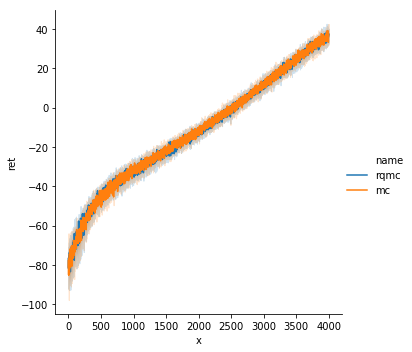

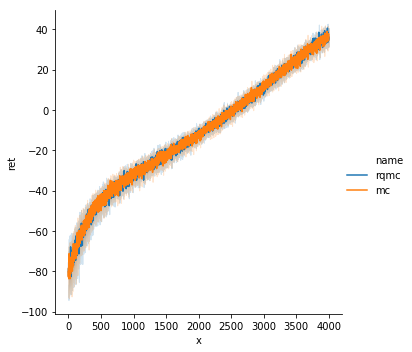

In [20]:
exp_name = 'search_vpg_ant_trajs'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)

N = 4000

for fn in input_dir.iterdir():
    if fn.is_dir(): continue
    with open(fn, 'rb') as f:
        results = dill.load(f)
        data = pd.concat([
            pd.concat([
                pd.DataFrame({
                    'name': name,
                    'ret': val[:N],
                    'x': np.arange(len(val))[:N]
                })
                for name, val in res.items()
            ])
            for res in results
        ])
        plot = sns.relplot(x='x', y='ret', kind='line', hue='name', data=data)
        plt.savefig(Path(output_dir, '{}.png'.format(fn.name)))

# Compare over number of trajectories

In [ ]:
exp_name = 'search_vpg_trajs_32'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)

N = 4000

for fn in input_dir.iterdir():
    with open(fn, 'rb') as f:
        results = dill.load(f)
        data = pd.concat([
            pd.concat([
                pd.DataFrame({
                    'name': name,
                    'ret': val[:N],
                    'x': np.arange(len(val))[:N]
                })
                for name, val in res.items()
            ])
            for res in results
        ])
        plot = sns.relplot(x='x', y='ret', kind='line', hue='name', data=data)
        plt.savefig(Path(output_dir, '{}.png'.format(fn.name)))

# Generate all plots for reinforcement learning on cartpole

ploting data/search_vpg/2000-32-32
ploting data/search_vpg/500-8
ploting data/search_vpg/1500-16
ploting data/search_vpg/1500-8
ploting data/search_vpg/1000-16-8
ploting data/search_vpg/1500-32-32
ploting data/search_vpg/500-16-8
ploting data/search_vpg/2000-8
ploting data/search_vpg/1500-16-16
ploting data/search_vpg/1000-32-32
ploting data/search_vpg/500-16-16
ploting data/search_vpg/500-32-32
ploting data/search_vpg/1000-8
ploting data/search_vpg/2000-16
ploting data/search_vpg/500-32-16
ploting data/search_vpg/1000-16-16


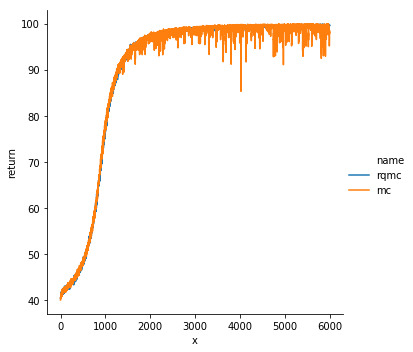

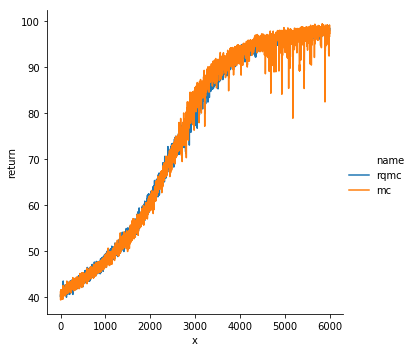

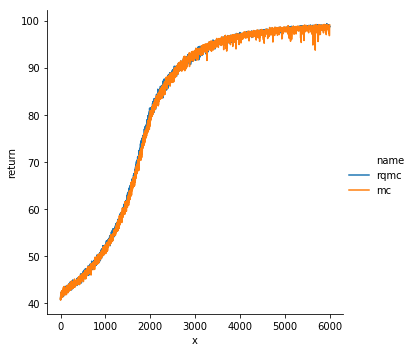

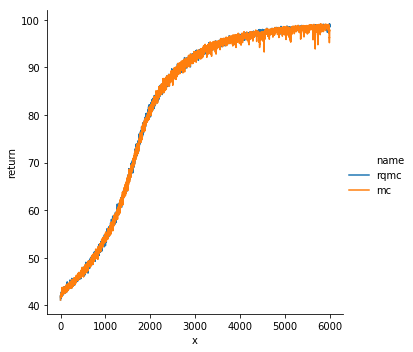

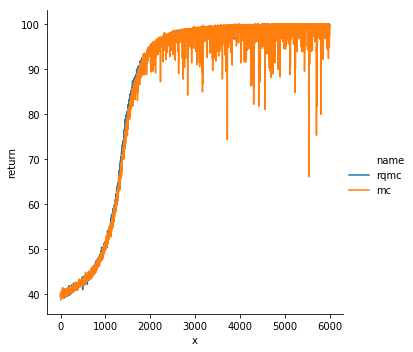

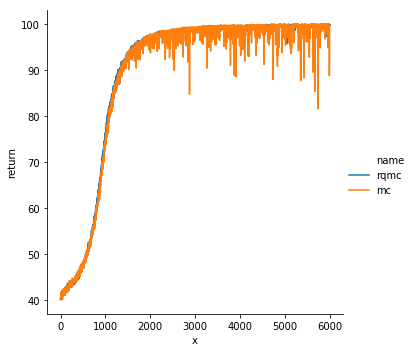

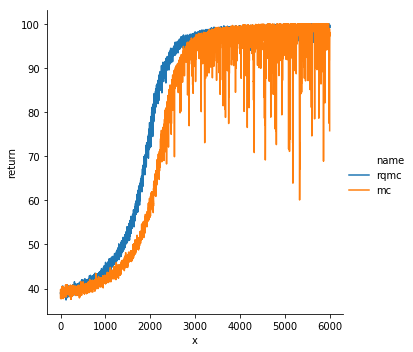

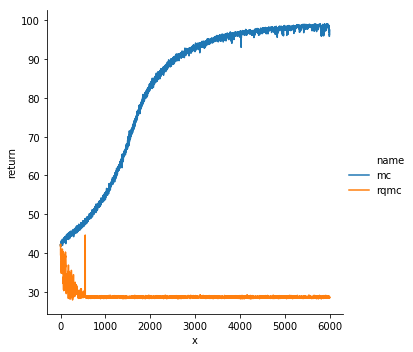

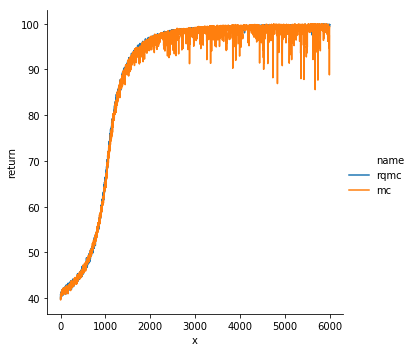

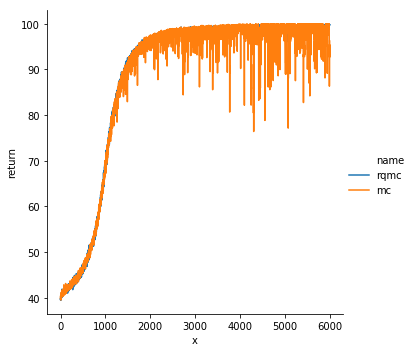

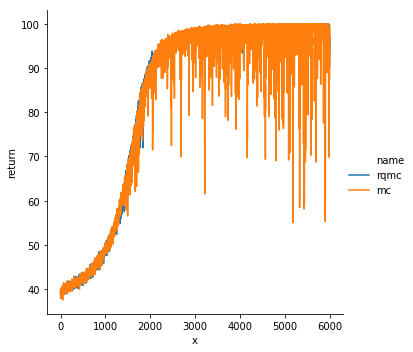

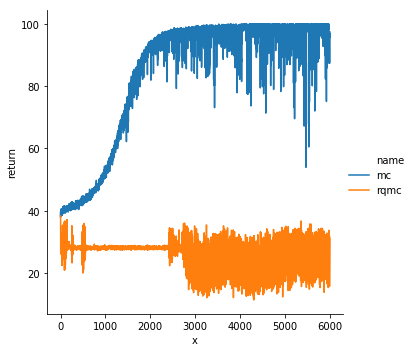

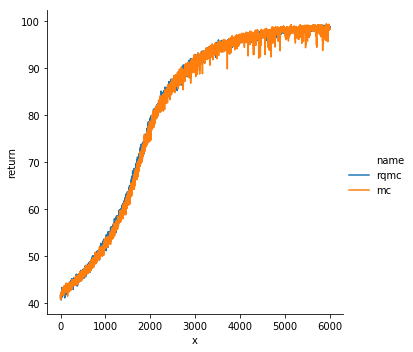

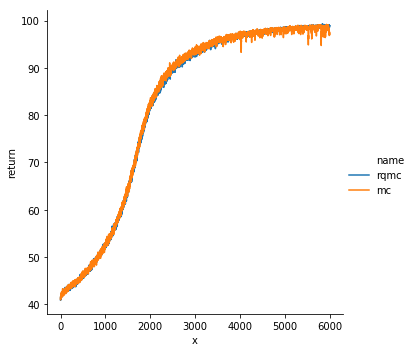

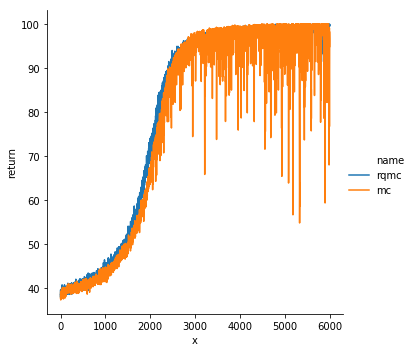

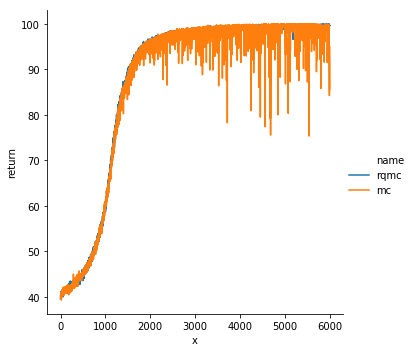

In [6]:
exp_name = 'search_vpg'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)
for fn in input_dir.iterdir():
    with open(fn, 'r') as f:
        print('ploting {}'.format(fn))
        info = json.load(f)
        data = pd.concat([
            pd.DataFrame({
                'name': name,
                'return': res,
                'x': np.arange(len(res))
            })
            for name, res in info.items()
        ])
        plot = sns.relplot(x='x', y='return', kind='line', hue='name', data=data)
        plt.savefig(Path(output_dir, '{}.png'.format(fn.name)))

# Generate all plots for network search

ploting data/search_arqmc_linear/traj_64-lr_0.001-H_20-init_3.0
ploting data/search_arqmc_linear/traj_64-lr_0.001-H_20-init_5.0
data/plots/search_arqmc_linear/traj_64-lr_0.001-H_20-init_1.0.png exists, skip
ploting data/search_arqmc_linear/traj_256-lr_0.0005-H_40-init_1.0
ploting data/search_arqmc_linear/traj_128-lr_0.0005-H_10-init_5.0
ploting data/search_arqmc_linear/traj_256-lr_0.001-H_5-init_3.0
data/plots/search_arqmc_linear/traj_128-lr_0.0001-H_10-init_3.0.png exists, skip
data/plots/search_arqmc_linear/traj_64-lr_0.0001-H_40-init_1.0.png exists, skip
ploting data/search_arqmc_linear/traj_64-lr_0.001-H_10-init_3.0
ploting data/search_arqmc_linear/traj_256-lr_0.0005-H_10-init_3.0
data/plots/search_arqmc_linear/traj_64-lr_0.0001-H_5-init_5.0.png exists, skip
data/plots/search_arqmc_linear/traj_256-lr_0.0001-H_10-init_1.0.png exists, skip
data/plots/search_arqmc_linear/traj_64-lr_0.0001-H_5-init_3.0.png exists, skip
data/plots/search_arqmc_linear/traj_64-lr_0.0001-H_20-init_1.0.png 

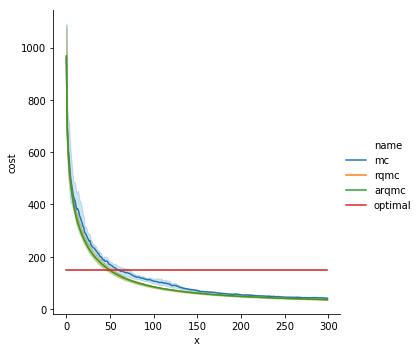

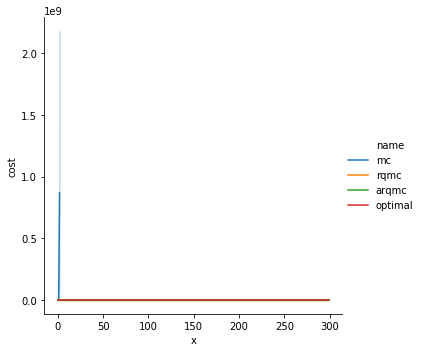

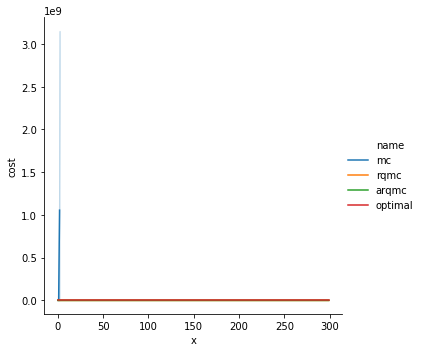

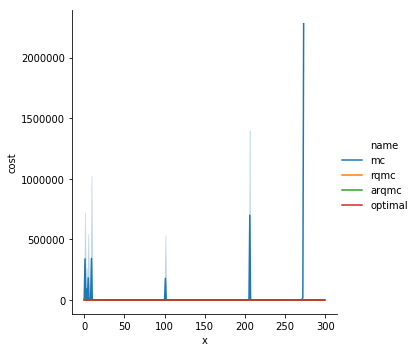

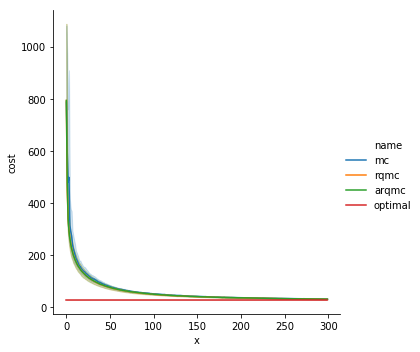

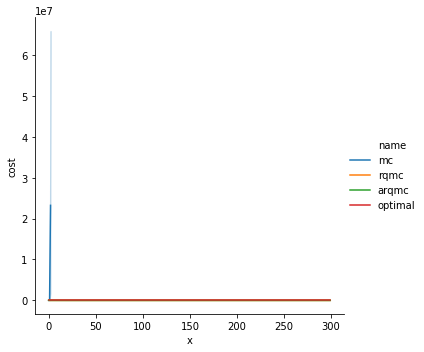

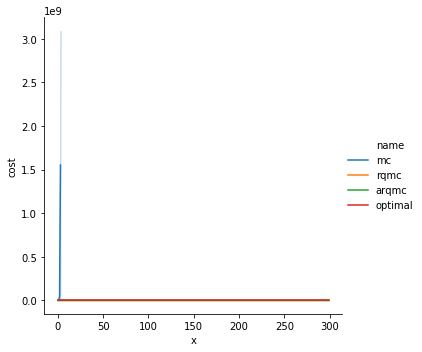

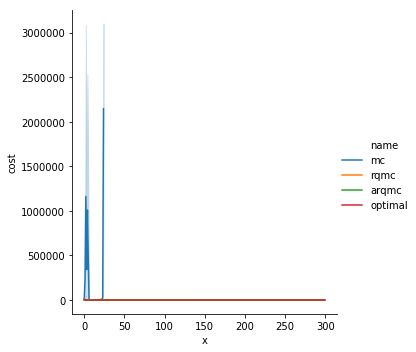

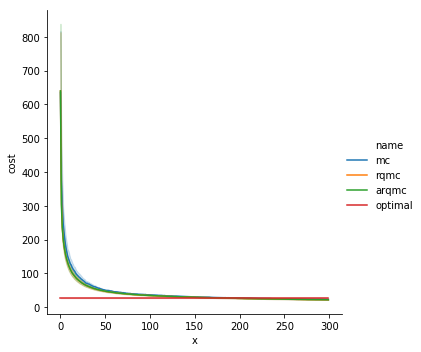

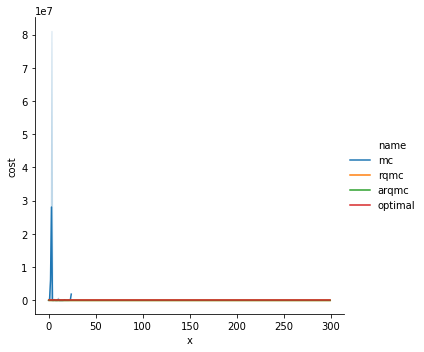

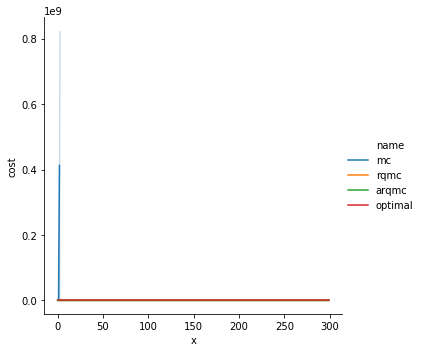

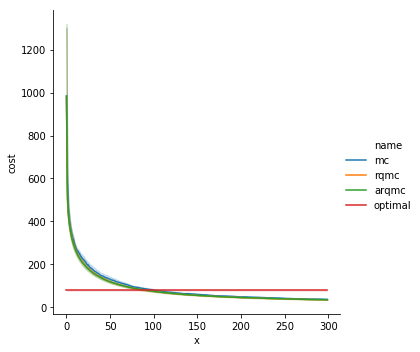

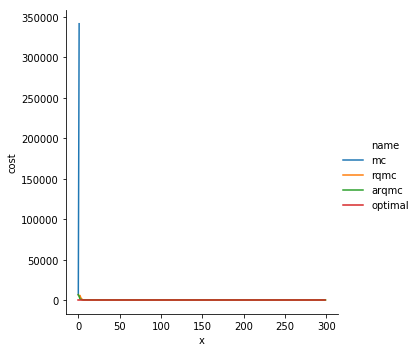

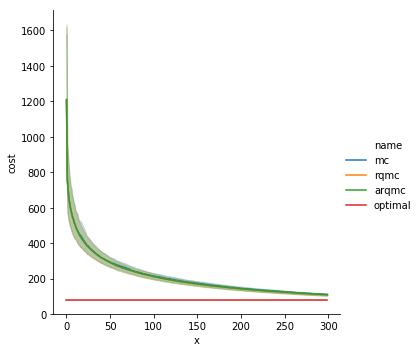

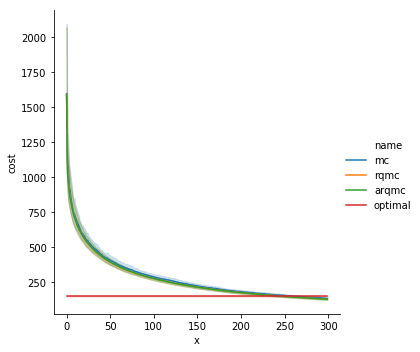

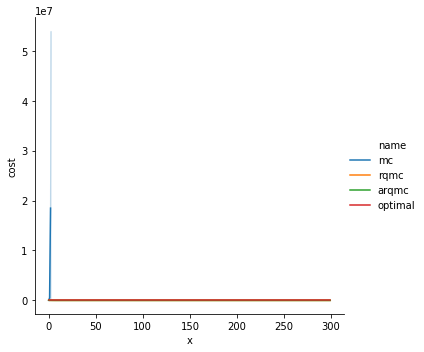

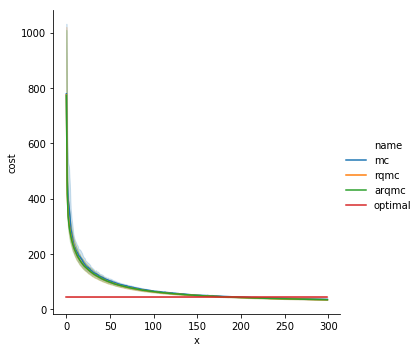

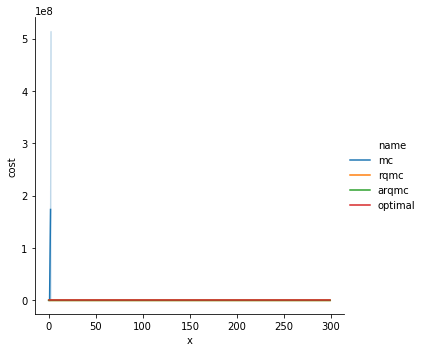

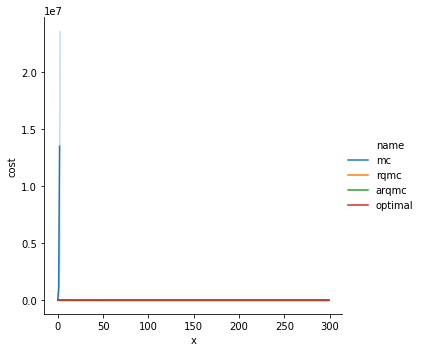

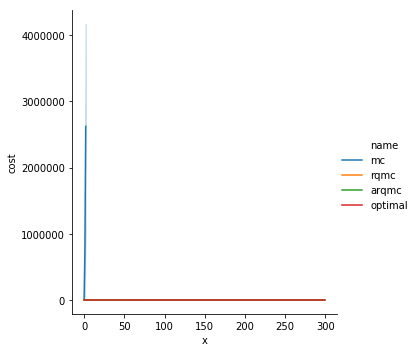

In [33]:
cover_duplicate = False
mc_discard_threshold = 5 # if the number of result is 

exp_name = 'search_arqmc_linear'
input_dir = Path('data', exp_name)
output_dir = Path('data/plots', exp_name)
output_dir.mkdir(parents=True, exist_ok=True)
for fn in input_dir.iterdir():
    save_path = Path(output_dir, '{}.png'.format(fn.name))
    if not cover_duplicate and save_path.exists():
        print('{} exists, skip'.format(save_path))
        continue
    with open(fn, 'rb') as f:
        print('ploting {}'.format(fn))
        full_results = dill.load(f)
        results = [res for res, info in full_results if len(info['out']) == 0]
        if len(results) < mc_discard_threshold:
            results = [res for res, info in full_results if len(info['out']) == 1]
        if len(results) == 0: continue # nothing works
        data = pd.concat([
            pd.concat([
                pd.DataFrame({
                    'name': name,
                    'cost': -val,
                    'x': np.arange(len(val))
                })
                for name, val in res.items()
            ])
            for res in results
        ])
        plot = sns.relplot(x='x', y='cost', kind='line', hue='name', data=data)
        plt.savefig(save_path)

# Compare Learning

In [27]:
#with open('data/search_network/200-0.0005-15-5.0', 'rb') as f:
with open('data/search_arqmc_linear/traj_128-lr_0.0001-H_10-init_3.0', 'rb') as f:
    full_results = dill.load(f)
    print('num of results:', len(full_results))
    print('num of outs:')
    print('mc:', len([res for res, info in full_results if 'mc' in info['out']]))
    print('rqmc:', len([res for res, info in full_results if 'rqmc' in info['out']]))
    print('arqmc:', len([res for res, info in full_results if 'arqmc' in info['out']]))
    print('optimal:', len([res for res, info in full_results if 'optimal' in info['out']]))
    results = [res for res, info in full_results if len(info['out']) == 0]
    print('number of learning results:', len(results))
    if len(results) < 5: # if not enough learning results, count the number of them that only mc is out
        results = [res for res, info in full_results if len(info['out']) == 1]
        print('number of learning results:', len(results))

num of results: 30
num of outs:
mc: 29
rqmc: 10
arqmc: 11
optimal: 0
number of learning results: 1
number of learning results: 17


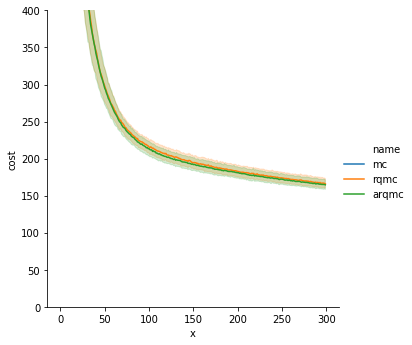

In [28]:
data = pd.concat([
    pd.concat([
        pd.DataFrame({
            'name': name,
            'cost': -val,
            'x': np.arange(len(val))
        })
        for name, val in res.items() if name != 'optimal'
    ])
    for res in results
])

#data = pd.concat([mc_data, rqmc_data, full_data, optimal_data])
plot = sns.relplot(x='x', y='cost', kind='line', hue='name', data=data)
plot.set(ylim=(0, 400))

# Compare Gradident

In [5]:
with open('data/compare_grad-10-100000', 'rb') as f:
    results = dill.load(f)
    results = [res for res in results if not np.isnan(res[1][-1])]
    print(len(results))
    print('rqmc wins in {}/{}'.format(np.sum([res[0][-1] > res[1][-1] for res in results]), len(results)))

200
rqmc wins in 200/200


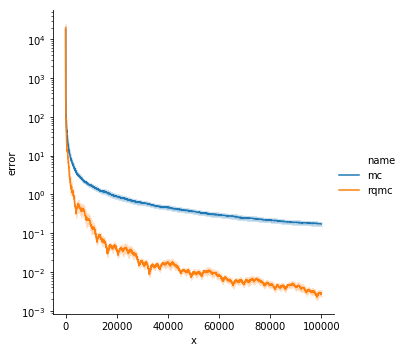

In [7]:
used_results = results[:50]

mc_data = pd.concat([
    pd.DataFrame(
        {'name': 'mc',
         'error': used_results[i][0],
         'x': np.arange(len(used_results[i][0]))}) for i in range(len(used_results))
])

rqmc_data = pd.concat([
    pd.DataFrame(
        {'name': 'rqmc',
         'error': used_results[i][1],
         'x': np.arange(len(used_results[i][1]))}) for i in range(len(used_results))
])

data = pd.concat([mc_data, rqmc_data])
plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
plot.set(yscale='log')

# Comparing over seeds (Return)

In [19]:
# load data

with open('log/arqmc_cost_h80_t128.pkl', 'rb') as f:
    results = dill.load(f)
    results = [res for res in results if not np.isnan(res[1][-1])]
    print(len(results))

10


In [20]:
mc_data = pd.concat([
    pd.DataFrame(
        {'name': 'mc',
         'error': results[i][0],
         'x': np.arange(len(results[i][0]))}) for i in range(len(results))
])

rqmc_data = pd.concat([
    pd.DataFrame(
        {'name': 'rqmc',
         'error': results[i][1],
         'x': np.arange(len(results[i][1]))}) for i in range(len(results))
])

arqmc_data = pd.concat([
    pd.DataFrame(
        {'name': 'arqmc',
         'error': results[i][2],
         'x': np.arange(len(results[i][2]))}) for i in range(len(results))
])

data = pd.concat([mc_data, rqmc_data, arqmc_data])
plot = sns.relplot(x='x', y='error', kind='line', hue='name', data=data)
plot.set(yscale='log')

ValueError: Mixing dicts with non-Series may lead to ambiguous ordering.

# One seed

In [4]:
#with open('one_seed/H-1.num_traj-2500.0.pkl', 'rb') as f:
#with open('one_seed/compare_0_100k.pkl', 'rb') as f:
with open('one_seed/H-5.num_traj-30000.1.pkl', 'rb') as f:
    results = dill.load(f)

mc_data = pd.DataFrame({
    'name': 'mc',
    'error': results['mc_errors'],
    'x': np.arange(len(results['mc_errors']))
})
rqmc_data = pd.DataFrame({
    'name': 'rqmc',
    'error': results['rqmc_errors'],
    'x': np.arange(len(results['rqmc_errors']))
})
data = pd.concat([mc_data, rqmc_data])

# Debug

In [11]:
import torch
from torch.optim import SGD

model = torch.nn.Linear(10, 10)
optimizer = SGD(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3)

model.bias.requires_grad = False

for name, param in model.named_parameters():
    print(name, param)

x = torch.randn(5, 10)
g = torch.randn(5, 10)

loss = torch.nn.functional.mse_loss(x, g)

optimizer.zero_grad()
loss.backward()
optimizer.step()

for name, param in model.named_parameters():
    print(name, param)

weight Parameter containing:
tensor([[-0.1934, -0.2758, -0.1425, -0.1616, -0.3068, -0.0743,  0.2823,  0.1410,
          0.0495,  0.2070],
        [ 0.1081, -0.0497, -0.0402,  0.1652, -0.1893, -0.0879,  0.1987, -0.0668,
          0.0091,  0.2850],
        [-0.0523, -0.0862,  0.1250, -0.2178,  0.0176,  0.2996,  0.0648,  0.0271,
          0.0990, -0.1839],
        [ 0.1761, -0.2515,  0.2376,  0.0828, -0.0556,  0.2213,  0.2378,  0.2849,
          0.1870, -0.0220],
        [ 0.1420, -0.2498,  0.1630,  0.0941,  0.2684,  0.1991, -0.1635,  0.1753,
          0.2791,  0.1415],
        [ 0.0059, -0.2648,  0.2324,  0.0913, -0.0097,  0.0066,  0.0373,  0.0405,
         -0.1373, -0.0539],
        [ 0.2882,  0.0784,  0.0264, -0.1116,  0.2229, -0.1447, -0.1129, -0.0699,
          0.2869,  0.0132],
        [-0.2146,  0.1866, -0.1010,  0.0016, -0.1902, -0.0917, -0.1621,  0.0455,
          0.2752, -0.0336],
        [ 0.2609, -0.3011,  0.3098, -0.0103,  0.0185,  0.1859, -0.2402, -0.2952,
         -0.1301, 

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn